In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
data = pd.read_csv("./mymass20.csv")
def filterByZ (Z, data):
    filteredDataByZ = data[data["Protones"] == Z].drop(["Drop1", "Drop2", "Drop3", "Drop4", "Drop5"], axis = 1).reset_index(drop = True)
    NNucleones = filteredDataByZ["Nucleones"].to_numpy()
    BEbyA = filteredDataByZ["BE/A"].to_numpy()
    BE = np.array([])
    for i in range(0,len(NNucleones)):
        BE = np.append(BE, [NNucleones[i]*BEbyA[i]])
    Sn = np.array([0])
    for i in range(1, len(BE)):
        Sn = np.append(Sn, [BE[i]-BE[i-1]])
    filteredDataByZ["Sn"] = Sn
    filteredDataByZ = filteredDataByZ.drop(0)
    return filteredDataByZ, filteredDataByZ["Neutrones"].to_numpy(), filteredDataByZ["Sn"].to_numpy()

Oxigen, On, OSn  = filterByZ(8,data)
Calcium, Can, CaSn = filterByZ(20,data)
Lead, Pbn, PbSn = filterByZ(82,data)
print("OXIGENO\n", Oxigen)
print("CALCIO\n",Calcium)
print("PLOMO\n",Lead)

OXIGENO
     Neutrones  Protones  Nucleones       BE/A          Sn
1           4         8         12  4881.9755  23796.8968
2           5         8         13  5811.7636  16969.2208
3           6         8         14  7052.2783  23178.9694
4           7         8         15  7463.6915  13223.4763
5           8         8         16  7976.2072  15663.9427
6           9         8         17  7750.7291   4143.0795
7          10         8         18  7767.0981   8045.3711
8          11         8         19  7566.4952   3955.6430
9          12         8         20  7568.5707   7608.0052
10         13         8         21  7389.3747   3805.4547
11         14         8         22  7364.8722   6850.3197
12         15         8         23  7163.4856   2732.9804
13         16         8         24  7039.6855   4192.2832
14         17         8         25  6727.8058   -757.3070
15         18         8         26  6497.4790    739.3090
16         19         8         27  6185.0000  -1939.4540
17   

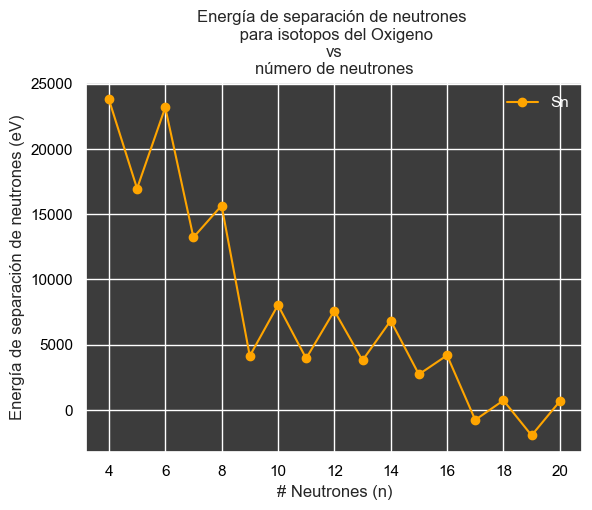

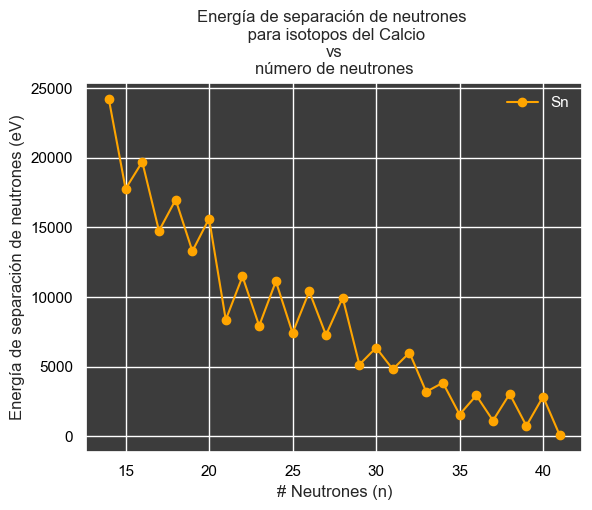

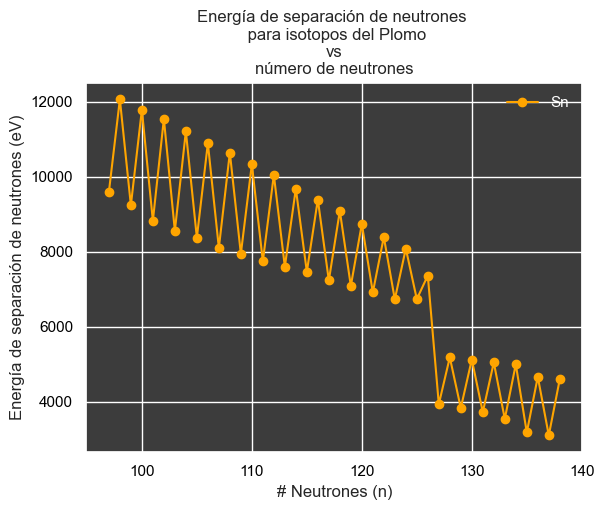

In [101]:
def Graph(Z,Sn,element):
    fig, ax = plt.subplots()
    # Dibujar el gráfico
    ax.plot(Z, Sn, label='Sn', color='Orange', linestyle='-', marker='o')
    # Configurar nombres de ejes
    ax.set_xlabel('# Neutrones (n)')
    ax.set_ylabel('Energía de separación de neutrones (eV)')
    # Agregar un título
    ax.set_title('Energía de separación de neutrones \n para isotopos del ' + element + '\nvs\nnúmero de neutrones', loc="center")
    # Agregar leyenda
    legend = ax.legend()
    for text in legend.get_texts():
        text.set_color('white')  
    ax.set_facecolor('#3C3C3C')  # Color de fondo
    ax.grid(color='white', linestyle='-', linewidth=1)  # Líneas de cuadrícula
    plt.xticks(color='black')  # Color de las marcas del eje X
    plt.yticks(color='black')  # Color de las marcas del eje Y
    plt.show()
Graph(On, OSn, 'Oxigeno')
Graph(Can, CaSn, "Calcio")
Graph(Pbn, PbSn, "Plomo")